In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

In [3]:
# Functional form of each HOD parameter

def M_function(magnitude,A,B,C,D):
    # Function for Mmin and M1
    return (A + 12) + B*(magnitude + 20) + C*(magnitude+20)**2 + D*(magnitude+20)**3 

def M0_function(magnitude, A, B):
    M0s = (A+11) + B*(magnitude+20)
    M0s[M0s <=1.0] = 1.0
    return M0s

def sigma_function(magnitude, A, B, C, D):
    return A + (B-A) / (1.+np.exp((C*(magnitude+20+D))))

def alpha_function(magnitude,A,B,C):
    return A + B ** (-magnitude - 20 + C)


# HODs

def number_centrals(logM, logMmin, sigma):
    return 0.5 * (1 + erf((logM-logMmin)/sigma))

def number_satellites(logM, logM0, logM1, alpha):
    N = ((10**logM-10**logM0)/10**logM1)**alpha
    N[np.isnan(N)] = 0
    return N

/tmp/ipykernel_396076/4133312131.py:26: RuntimeWarning: invalid value encountered in power
  N = ((10**logM-10**logM0)/10**logM1)**alpha


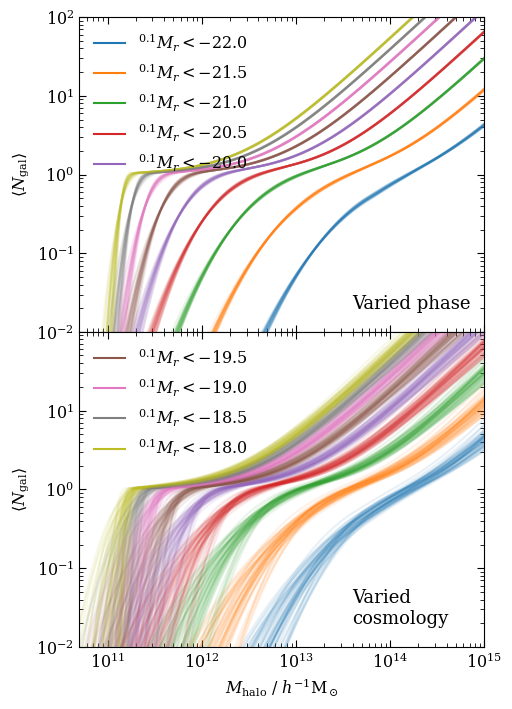

In [9]:
# set font
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

# initialize subplots
f, ax = plt.subplots(2,1, figsize=(5,7)) 
plt.subplots_adjust(wspace=0, hspace=0, top = 0.98, bottom = 0.08, right = 0.95, left = 0.14)
for i in range(2):
    ax[i].tick_params(direction="in", top=True, right=True, length=5, labelsize=11.5)
    ax[i].tick_params(which="minor", direction="in", top=True, right=True, length=3, labelsize=11.5)
    

# plot the HODs for c000 and phases ph000-024
mags = np.arange(-22, -17.9, 0.5)
logM = np.arange(10,16,0.01)
c = 0
for ph in range(25):
    params = np.loadtxt("data/best_fits/AbacusSummit_base_c%03d_ph%03d_best_params.txt"%(c,ph))
    
    Mmin = M_function(mags, *params[:4])
    sigma = sigma_function(mags, *params[4:8])
    M0 = M0_function(mags, *params[8:10])
    M1 = M_function(mags, *params[10:14])
    alpha = alpha_function(mags, *params[14:])
    
    for i in range(len(mags)):
        Ncen = number_centrals(logM, Mmin[i], sigma[i])
        Nsat = number_satellites(logM, M0[i], M1[i], alpha[i])
        
        ax[0].plot(10**logM, Ncen + Nsat*Ncen, c="C%i"%i, alpha=0.1)
        
        
# plot the HODs for c130-182
ph = 0
for c in range(130,182):
    params = np.loadtxt("data/best_fits/AbacusSummit_base_c%03d_ph%03d_best_params.txt"%(c,ph))
    
    Mmin = M_function(mags, *params[:4])
    sigma = sigma_function(mags, *params[4:8])
    M0 = M0_function(mags, *params[8:10])
    M1 = M_function(mags, *params[10:14])
    alpha = alpha_function(mags, *params[14:])
    
    for i in range(len(mags)):
        Ncen = number_centrals(logM, Mmin[i], sigma[i])
        Nsat = number_satellites(logM, M0[i], M1[i], alpha[i])
        
        ax[1].plot(10**logM, Ncen + Nsat*Ncen, c="C%i"%i, alpha=0.1)
        
# split the magnitude legend between panels
for i in range(len(mags)):
    if i<5:
        ax[0].plot([],[],c="C%i"%i, label=r"${}^{0.1}M_r < %.1f$"%mags[i])
    else:
        ax[1].plot([],[],c="C%i"%i, label=r"${}^{0.1}M_r < %.1f$"%mags[i])

ax[0].legend(loc="upper left", fontsize=11.5).draw_frame(False)
ax[1].legend(loc="upper left", fontsize=11.5).draw_frame(False)

# set axis limits and labels
ax[0].text(4e13, 0.02, 'Varied phase', fontsize=13)
ax[1].text(4e13, 0.02,'Varied\ncosmology', fontsize=13)
    
for i in range(2):   
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].set_xlim(5e10,1e15)
    ax[i].set_ylim(1e-2,1e2)
ax[1].set_ylim(1e-2,99)
ax[0].set_xticklabels([])

ax[1].set_xlabel(r"$M_\mathrm{halo} \ / \ h^{-1}\mathrm{M}_\odot$", fontsize=11.5)
ax[0].set_ylabel(r"$\langle N_\mathrm{gal} \rangle$", fontsize=11.5)
ax[1].set_ylabel(r"$\langle N_\mathrm{gal} \rangle$", fontsize=11.5)

# save the figure as a pdf
plt.savefig("pdf/Figure_5.pdf", dpi=300)